In [1]:
import matplotlib.pyplot as plt
import numpy as np
from   numpy.linalg import inv
import numpy.random as npr
from   pypolyagamma import PyPolyaGamma
from scipy.stats import multivariate_normal

from heapq import heappush, heappop

import matplotlib.cm as cm
from tqdm import tqdm
import polars as pl

import geopandas as gpd

from shapely.geometry import Point, Polygon
from shapely import wkt

import pandas as pd
import statsmodels.api as sm
import scipy
import scipy.optimize as opt
import seaborn as sns

from pyproj import Transformer

from bayesian_statistics.utils_2 import *
import japanize_matplotlib

from keplergl import KeplerGl

In [2]:
# polarsとしても読み込む
df_elevation = pl.read_csv("../data/gdf_elevation.csv")

In [ ]:
sns.heatmap(df_elevation,)

mesh_code_5th,average_elevation,maximum_elevation,minimum_elevation,minimum_elevation_code,maximum_slope_angle,maximum_slope_direction,minimum_slope_angle,minimum_slope_direction,average_slope_angle,geometry,x,y
i64,f64,f64,f64,str,f64,str,f64,str,f64,str,f64,f64
5138709011,null,null,null,"""nan""",null,"""nan""",null,"""nan""",null,"""POLYGON ((138 34.6583333356293…",138.001563,34.659375
5138709012,1.2,2.8,0.1,"""0""",2.1,"""5""",1.8,"""5""",2.0,"""POLYGON ((138.003125 34.658333…",138.004688,34.659375
5138709021,2.0,4.9,0.0,"""0""",5.0,"""5""",1.2,"""5""",2.5,"""POLYGON ((138.00625 34.6583333…",138.007812,34.659375
5138709022,3.6,10.5,0.0,"""0""",3.2,"""5""",0.9,"""5""",1.9,"""POLYGON ((138.009375 34.658333…",138.010938,34.659375
5138709013,3.3,12.7,0.0,"""0""",5.6,"""5""",0.1,"""7""",1.7,"""POLYGON ((138 34.6604166689627…",138.001563,34.661458
…,…,…,…,…,…,…,…,…,…,…,…,…
5540379842,null,null,null,"""nan""",null,"""nan""",null,"""nan""",null,"""POLYGON ((140.98437500001108 3…",140.985938,36.996875
5540379833,19.9,49.4,6.2,"""0""",16.1,"""4""",0.5,"""4""",7.5,"""POLYGON ((140.97500000001108 3…",140.976563,36.998958
5540379834,12.6,50.2,0.3,"""0""",15.6,"""2""",1.4,"""2""",8.0,"""POLYGON ((140.9781250000111 36…",140.979688,36.998958


<module 'matplotlib.pyplot' from '/home/ohta/dev/bayesian_statistics/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

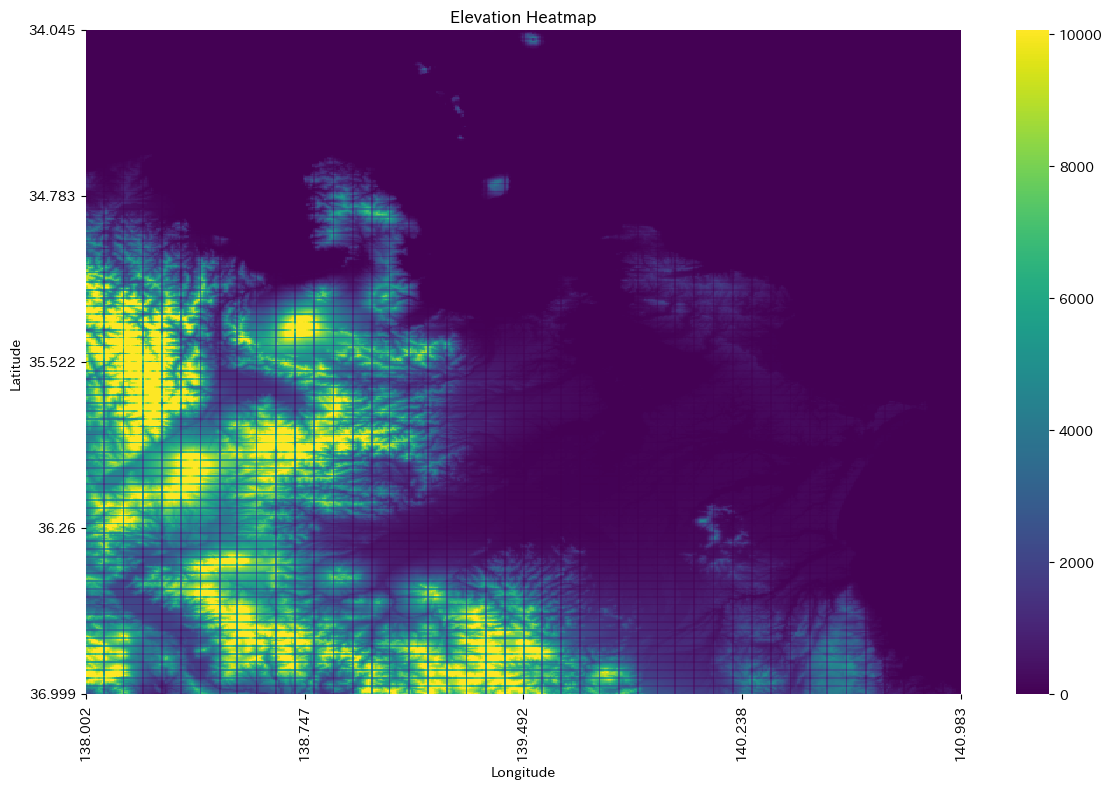

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_elevation_heatmap(df: pl.DataFrame, col:str,resolution: int = 500):
    # nullを除外
    df_clean = df.filter(pl.col('average_elevation').is_not_null())
    
    # メッシュグリッドの作成
    x_min, x_max = df_clean['x'].min(), df_clean['x'].max()
    y_min, y_max = df_clean['y'].min(), df_clean['y'].max()
    
    # グリッドポイントの作成
    x_grid = np.linspace(x_min, x_max, resolution)
    y_grid = np.linspace(y_min, y_max, resolution)
    
    # 2Dヒストグラムの作成
    H, _, _ = np.histogram2d(
        df_clean['x'].to_numpy(),
        df_clean['y'].to_numpy(),
        bins=(resolution, resolution),
        weights=df_clean['average_elevation'].to_numpy()
    )
    
    # 描画
    plt.figure(figsize=(12, 8))
    
    # ヒートマップの作成
    sns.heatmap(
        H.T,  # 転置して正しい向きに
        cmap='viridis',  # カラーマップ
        robust=True,     # 外れ値に対してロバスト
    )
    
    # 軸ラベルの設定
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Elevation Heatmap')
    
    # x軸とy軸のティックラベルを実際の座標に変換
    x_ticks = np.linspace(0, resolution, 5)
    y_ticks = np.linspace(0, resolution, 5)
    x_labels = np.linspace(x_min, x_max, 5).round(3)
    y_labels = np.linspace(y_min, y_max, 5).round(3)
    
    plt.xticks(x_ticks, x_labels)
    plt.yticks(y_ticks, y_labels)
    
    plt.tight_layout()
    return plt

# 使用例
create_elevation_heatmap(df_elevation,

In [3]:
def calculate_grid_sizes(df: pl.DataFrame, epsg=32654):
    """
    polars DataFrameからグリッドサイズを計算する関数
    dfはx,y列(経度・緯度, EPSG:4326想定)を含む
    epsg: 変換先のUTMゾーン等のEPSGコード (例：日本の関東地方はEPSG:32654)
    """
    # x,yのunique値抽出
    x_unique = df.select("x").unique().to_series().to_list()
    y_unique = df.select("y").unique().to_series().to_list()
    
    x_unique.sort()
    y_unique.sort()
    
    x_step = x_unique[1] - x_unique[0]
    y_step = y_unique[1] - y_unique[0]
    
    center_x = np.median(x_unique)
    center_y = np.median(y_unique)
    
    # EPSG:4326 -> EPSG:32654などへの変換器
    transformer = Transformer.from_crs("EPSG:4326", f"EPSG:{epsg}", always_xy=True)
    
    # 中心点とそこからx_step, y_step進んだ点を投影座標に変換
    x1, y1 = transformer.transform(center_x, center_y)
    x2, y2 = transformer.transform(center_x + x_step, center_y)
    x3, y3 = transformer.transform(center_x, center_y + y_step)
    
    # 距離計算(ユークリッド距離)
    x_size = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    y_size = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    
    return x_size, y_size


x_size, y_size = calculate_grid_sizes(df_elevation)
print(f"東西方向: {x_size:.1f} m")
print(f"南北方向: {y_size:.1f} m")
print(f"面積: {x_size * y_size:.1f} m²")

東西方向: 283.1 m
南北方向: 231.1 m
面積: 65420.5 m²


左下を原点とする座標を設定

In [4]:
# 4方向の方角
directions = ["east", "west", "north", "south"]

# 4方向のx, yの変化
dx = {
    "east": -1,
    "west":  1,
    "north": 0,
    "south": 0
}

dy = {
    "east":  0,
    "west":  0,
    "north": -1,
    "south":  1
}

# Toblerのハイキング関数
def tobler_velocity(angle_deg):
    slope = np.tan(np.radians(angle_deg))
    return 6 * np.exp(-3.5 * abs(slope + 0.05))

# メートルからキロメートルへの変換係数
x_distance_km = x_size / 1000

# 時間から分への変換係数
hours_to_minutes = 60

In [ ]:
# グリッド番号を割り当てる
df_elevation = (
    df_elevation
    .join(
        (
            df_elevation.select("x")
            .unique()
            .sort("x")
            .with_row_index(name="grid_x")  # ここで一度grid_x割り当て
        ), 
        on="x", 
        how="left"
    )
    .join(
        (
            df_elevation.select("y")
            .unique()
            .sort("y")
            .with_row_index(name="grid_y")  # 同様にgrid_y割り当て
        ), 
        on="y", 
        how="left"
    )
    .with_columns([
        pl.col("grid_x").cast(pl.Int64),
        pl.col("grid_y").cast(pl.Int64),
    ])
)

for d in directions:
    
    df_elevation = (

        # 隣接セルの標高を取得
        df_elevation
        .join(
            (
                df_elevation.select(
                    (pl.col("grid_x")+dx[d]).alias("gx"),
                    (pl.col("grid_y")+dy[d]).alias("gy"),
                    pl.col("average_elevation").alias(f"ae_{d}")
                )
            ),
            left_on=["grid_x","grid_y"],
            right_on=["gx","gy"],
            how="left"
        )
        .with_columns(
            (pl.col(f"ae_{d}") - pl.col("average_elevation"))
            .alias(f"elevation_diff_{d}")
        )
        .drop([f"ae_{d}"])

        # 勾配角度を計算
        .with_columns(
            (pl.col(f"elevation_diff_{d}") / x_size)
              .arctan()
              .degrees()
              .alias(f"angle_{d}")
        )

        # 勾配から、Toblerのハイキング関数を使用して歩行速度を計算
        .with_columns(
            pl.when(~pl.col(f"angle_{d}").is_null())
              .then(tobler_velocity(pl.col(f"angle_{d}")))
              .otherwise(pl.lit(np.nan))
              .alias(f"walking_velocity_{d}")
        )
        
        # 歩行速度から、移動時間を計算
        .with_columns(
            pl.when(pl.col(f"walking_velocity_{d}").is_not_nan())
              .then((x_distance_km / pl.col(f"walking_velocity_{d}")) * hours_to_minutes)
              .otherwise(pl.lit(np.nan))
              .alias(f"travel_time_{d}")
        )
    )

In [ ]:
def prepare_data_for_dijkstra(df, target_geometry, x_size, y_size):
    """
    dfは以下の列を持つと仮定:
    - grid_x: int
    - grid_y: int
    - geometry: shapely Polygon（WGS84など位置参照不要な単純な多角形）
    - travel_time_east, travel_time_west, travel_time_north, travel_time_south: float or NaN

    前処理として:
    - (grid_x, grid_y)から1次元インデックスへの対応付け
    - travel_timeを2D配列化
    - target_geometryとの交差セルを特定
    """

    # grid_x, grid_yが0-basedの連続整数と仮定
    max_x = df["grid_x"].max()
    max_y = df["grid_y"].max()

    width = max_x + 1
    height = max_y + 1

    # 1次元インデックスへのマッピング関数
    def idx(x, y):
        return y * width + x

    n_cells = (width * height)

    # min_costs用に∞で初期化
    # float64で良い
    min_costs = np.full(n_cells, np.inf, dtype=np.float64)

    # travel_timeをまとめる
    # 方向は0:east,1:west,2:north,3:southとする
    directions = [("east",1,0), ("west",-1,0), ("north",0,1), ("south",0,-1)]
    dir_map = {"east":0, "west":1, "north":2, "south":3}

    travel_times = np.full((4, height, width), np.nan, dtype=np.float64)

    # dfをイテレートしてtravel_timeを格納
    # geometryやtravel_time_*列を参照するため一度to_dictやiterrowsを使う
    for row in tqdm(df.iter_rows(named=True)):
        gx = row["grid_x"]
        gy = row["grid_y"]
        # 各方向のtravel_timeをセット
        for d in directions:
            dname = d[0]
            val = row[f"travel_time_{dname}"]
            if not np.isnan(val):
                travel_times[dir_map[dname], gy, gx] = val

    # target_geometryと交差するセルを特定
    starting_indices = []
    for row in tqdm(df.iter_rows(named=True)):
        gx = row["grid_x"]
        gy = row["grid_y"]
        geom = row["geometry"]
        geom = wkt.loads(geom)  # shapely Polygon
        if target_geometry.intersects(geom):
            cell_idx = idx(gx, gy)
            min_costs[cell_idx] = 0.0
            starting_indices.append(cell_idx)

    if len(starting_indices) == 0:
        raise ValueError("対象ジオメトリと交差するセルが見つかりませんでした。")

    return min_costs, travel_times, width, height, starting_indices, directions


def run_dijkstra(min_costs, travel_times, width, height, directions):
    """
    Dijkstra法で最小コストを計算
    min_costs: np.ndarray 1D (サイズwidth*height)
    travel_times: np.ndarray shape=(4, height, width)
    width, height: グリッド幅・高さ
    directions: [("east",dx,dy), ...]
    """

    def idx(x, y):
        return y * width + x

    visited = np.full_like(min_costs, False, dtype=bool)
    queue = []

    # 開始セルをキューに登録
    for i in range(len(min_costs)):
        if min_costs[i] == 0.0:
            # 0コストのセル（始点）をプッシュ
            y, x = divmod(i, width)
            heappush(queue, (0.0, x, y))

    while queue:
        current_cost, cx, cy = heappop(queue)
        cidx = idx(cx, cy)

        if visited[cidx]:
            continue
        visited[cidx] = True

        # 隣接セルへ
        for d_i, (dname, dx, dy) in enumerate(directions):
            nx, ny = cx + dx, cy + dy
            # 範囲外ならスキップ
            if nx < 0 or nx >= width or ny < 0 or ny >= height:
                continue

            # travel_timeがNaNなら移動不可
            t = travel_times[d_i, cy, cx]
            if np.isnan(t):
                continue

            nidx = idx(nx, ny)
            new_cost = current_cost + t
            if new_cost < min_costs[nidx]:
                min_costs[nidx] = new_cost
                heappush(queue, (new_cost, nx, ny))

    return min_costs

# 2つをまとめて実行する関数
def calculate_minimum_cost_to_geometry(df, target_geometry, x_size, y_size, geometry_name=""):
    
    min_costs, travel_times, width, height, starting_indices, directions = prepare_data_for_dijkstra(
        df, 
        target_geometry, 
        x_size, 
        y_size
    )

    print(f"starting_indices: {starting_indices}")

    min_costs = run_dijkstra(
        min_costs, 
        travel_times, 
        width, 
        height, 
        directions
    )

    # grid_x, grid_y, min_cost_minutsという列を持つpl.DataFrameを作成
    min_costs_df = pl.DataFrame({
        "grid_x": np.tile(np.arange(width), height),
        "grid_y": np.repeat(np.arange(height), width),
        f"cost_{geometry_name}": min_costs
    })

    return min_costs_df

In [10]:
# 和田峠との距離を計算
wada_point = Point(138.1431305514158, 36.14658805493071)

In [11]:
min_costs_df = calculate_minimum_cost_to_geometry(
    df_elevation, 
    wada_point, 
    x_size, 
    y_size, 
    geometry_name="wada"
)

df_elevation = df_elevation.join(min_costs_df, on=["grid_x", "grid_y"], how="left")

797696it [00:07, 106651.89it/s]
797696it [00:23, 34061.75it/s]


starting_indices: [877653]


In [12]:
gdf_elevation = df_elevation.to_pandas()
gdf_elevation['geometry'] = gdf_elevation.geometry.apply(wkt.loads)
gdf_elevation = gpd.GeoDataFrame(gdf_elevation, geometry='geometry')
gdf_elevation.crs = "EPSG:4326"

- 時期の分け方
    - 早々期、早期
    - 前期
    - 中期
    - 後期
    - 晩期
        - 晩期は後期とセットでも良い
  - 早期〜晩期(五領ヶ台Ⅱ〜阿玉台前半主体)は中期〜前期→中期
  - 早期〜後期(条痕文系が6割程度)は早期〜早期後葉→早期